# <h1><center>PIMA Diabetes - K-Mean Clustering Algorithm</center></h1>

<center><img src="diabetes.jpg" width="500" height="500"></center>

## <center>By : Nitika</center>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import silhouette_score

# File loading

In [64]:
diabetes_data="diabetes.csv"

#load data using panda's read_csv function
diabetes_df = pd.read_csv(diabetes_data)


#list the dataset
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA and Statistical Analysis

In [3]:
## gives information about the data types,columns, null value counts, memory usage etc
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


  ### We can observe that the data set contain 768 rows and 9 columns. ‘Outcome’ is the column which we are going to predict, which says if the patient is diabetic or not. 1 means the person is diabetic and 0 means a person is not

In [65]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


    describe() : generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

    the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns

In [66]:
diabetes_df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

0    500
1    268
Name: Outcome, dtype: int64


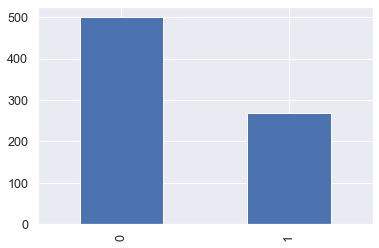

In [67]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

    The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

# Correlation Matrix : Heatmap

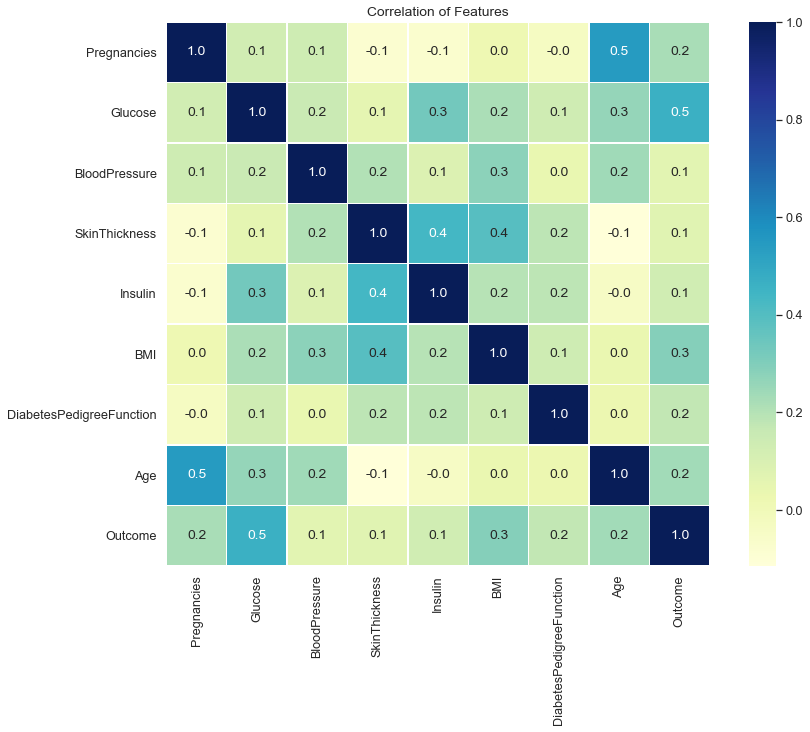

In [68]:
sns.set(font_scale = 1.15)
plt.figure(figsize = (14, 10))

sns.heatmap(diabetes_df.corr(), vmax = 1, linewidths = 0.5, fmt= '.1f',
            square = True, annot = True, cmap = 'YlGnBu', linecolor = "white")
plt.title('Correlation of Features');

### We observe that:
    * Glucose, Age and BMI are the most Correlated features with the 'Outcome'
    * Bloodpressure, SkinThikness have tiny Correlation with the outcome !
    * check how the SkinThikness and BMI Correlated, since most of the fat people tends to have thick skin
    * Age with Pregnancies are the most Correlated features
    * Insulin with Glucuse
    * finally SkinThikness with Insulin !

# Data Cleaning

In [8]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

     We can observe that there are no data points missing in the data set. If there were any, we should deal with them accordingly.
    
    But in describe() we notice that Glucose, BloodPressure, skinThickness, Insulin and BMI have minimum value as 0(zero) which doesn't make any sense,
    So its better to replaves zero with NaN and after that countinf them would be eaiser and zero need to be replacced with suitable values

In [69]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11912f310>,
      dtype=object)

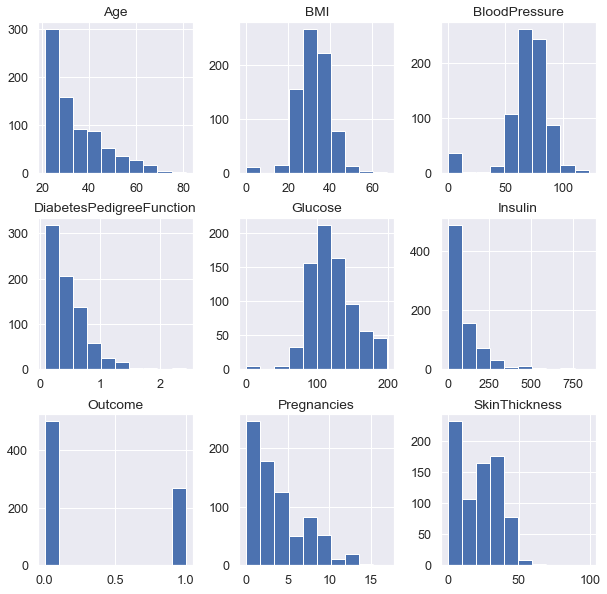

In [70]:
diabetes_df.hist(figsize = (10,10))

    When analyzing the histogram we can identify that there are some outliers in some columns. We will further analyze those outliers and determine what we can do about them.

### From above histogram we observe the follwoing:
     * Blood pressure: By observing the data we can see that there are 0 values for blood pressure. And it is evident that the readings of the data set seem wrong because a living person cannot have a diastolic blood pressure of zero. By observing the data we can see 35 counts where the value is 0.
     * Plasma glucose levels :Even after fasting glucose levels would not be as low as zero. Therefore zero is an invalid reading. By observing the data we can see 5 counts where the value is 0.
     * Skin Fold Thickness:  For normal people, skin fold thickness can’t be less than 10 mm better yet zero. Total count where value is 0: 227.
     * BMI: Should not be 0 or close to zero unless the person is really underweight which could be life-threatening.
     * Insulin: In a rare situation a person can have zero insulin but by observing the data, we can find that there is a total of 374 counts.

#### So we impute nan values for the columns in accordance with their distribution

In [71]:
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)

In [72]:
print(diabetes_df_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


    So , now our data is prepared , there are no null values , no zero values in our dataset

# K-Mean Clustring Algorithm

### Our Diabetes dataset is a dataset of 786 samples of diabetic and healthy individuals, as there are 8 attributes, we'd like to reduce then  and cluster the resulting components to find any distinguished clusters.

#### K-means is a method of classifying items into k groups by minimizing the sum of squared distances (Euclidean distances) between items and centroids.

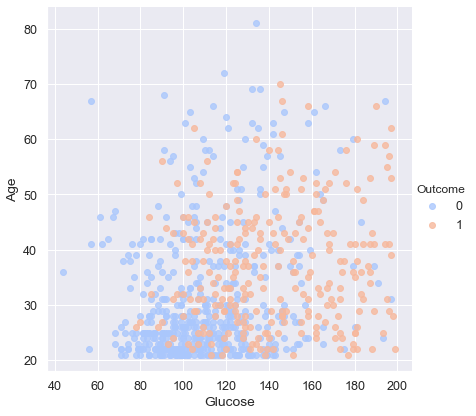

In [73]:
sns.lmplot('Glucose','Age',data=diabetes_df_copy, hue='Outcome',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

In [79]:
X = diabetes_df_copy[['Glucose','Age']]
                     
X.head()

,Glucose,Age
0,148.0,50
1,85.0,31
2,183.0,32
3,89.0,21
4,137.0,33


Centroid: 
 [[147.3030303   52.87878788]
 [103.05882353  25.60588235]
 [ 81.86178862  28.65853659]
 [181.91139241  37.89873418]
 [108.37974684  48.87341772]
 [148.26966292  28.64044944]
 [123.55206058  29.36419753]]


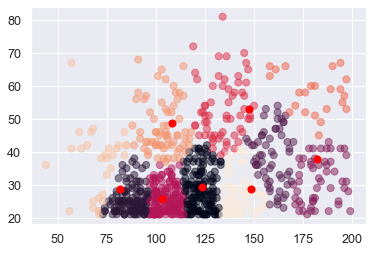

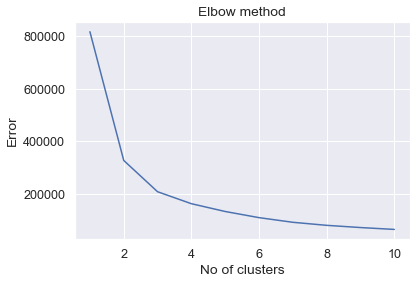

The silhouette_score is :	 0.38548890996032864


In [95]:
kmeans_cluster = KMeans(n_clusters=7)
kmeans_pattern = kmeans_cluster.fit_predict(X)
#print(kmeans_pattern)
centroids = kmeans_cluster.cluster_centers_
print("Centroid: \n",centroids)


plt.scatter(X['Glucose'], X['Age'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

print("The silhouette_score is :\t",silhouette_score(X, kmeans_pattern))



    Note that the center of each cluster (in red) represents the mean of all the observations that belong to that cluster.

    As you may also see, the observations that belong to a given cluster are closer to the center of that cluster, in comparison to the centers of other clusters.

    Elbow method helps to select the optimal number of clusters for KNN clustering. It is one of the most popular methods to determine this optimal value of K.
    And 
    Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
    1: Means clusters are well apart from each other and clearly distinguished.
    0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
    -1: Means clusters are assigned in the wrong way.

The silhouette_score is :	 0.5226260268567667
Centroid: 
 [[158.12195122  38.26829268]
 [104.51615673  30.87164751]]


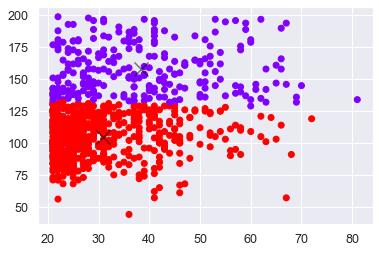

In [94]:
# here we are using n_clusters with 2
kmeans_cluster = KMeans(n_clusters=2)
kmeans_pattern = kmeans_cluster.fit_predict(X)

centers = kmeans_cluster.cluster_centers_

plt.scatter(X.iloc[:, 1], X.iloc[:, 0], c=kmeans_pattern, cmap='rainbow')

plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5,marker='x')
print("The silhouette_score is :\t",silhouette_score(X, kmeans_pattern))

print("Centroid: \n", centers)

    We observe that, for cluster = 2 the score is 0.52 , which is more close to 1 , which mean the clusters are well apart from eact other and are distinguished from each other . Although for cluster = 7 , the score is 0.37 , which no half close to 1 

### So, now we will Predict diabetes(Outcome) using Age,Glucose,BloodPressure, BMI, Insluin

In [106]:
# here we are using n_clusters with 7
df = diabetes_df_copy[['BloodPressure','BMI', 'Insulin','Age','Glucose' ]]
Y = df


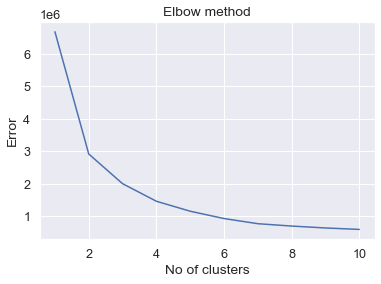

The silhouette_score is :	 0.3718760509288718


In [107]:
kmeans_cluster = KMeans(n_clusters=7)
kmeans_pattern = kmeans_cluster.fit_predict(Y)

centroids = kmeans_cluster.cluster_centers_

Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(Y)
    kmeans.fit(Y)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

print("The silhouette_score is :\t",silhouette_score(Y, kmeans_pattern))

[[ 72.43143462  32.21755618 121.21488764  33.20224719 118.93319356]
 [ 72.07142857  35.47678571 388.05357143  33.73214286 156.69642857]]
The silhouette_score is :	 0.7297611403255541


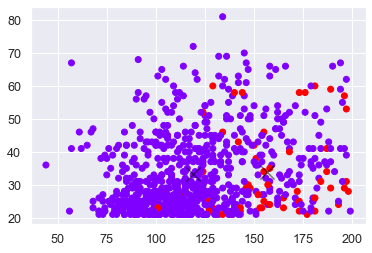

In [108]:

# As you can see, the optimal value of k is between 1 and 2, as the elbow-like 
#shape is formed at k=2 in the above graph.

kmeans_cluster = KMeans(n_clusters=2)
kmeans_pattern = kmeans_cluster.fit_predict(Y)
#print(kmeans_pattern)
print(kmeans_cluster.cluster_centers_)


plt.scatter(Y.iloc[:, 4], Y.iloc[:, 3], c=kmeans_pattern, cmap='rainbow')

centers = kmeans_cluster.cluster_centers_
plt.scatter(centers[:, 4], centers[:, 3], c='black', s=200, alpha=0.5,marker='x')

print("The silhouette_score is :\t",silhouette_score(Y, kmeans_pattern))

    We can see that the 
    for cluster = 2 , the silhouette_score : 0.72 which is better than silhouette_score : 0.37 for the  cluster = 7
    As silhouette_score for k = 2 is more closer to 1 , Means clusters are well apart from each other and clearly distinguished.
    
